<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/ML_Learning%3B_Carlifornia_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
df0 = pd.read_csv("/content/sample_data/california_housing_test.csv")
df0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [228]:
df0.info()
df0.isnull().sum()
df0.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


,count,mean,std,min,25%,50%,75%,max
longitude,3000.0,-119.589200,1.994936,-124.1800,-121.810,-118.48500,-118.020000,-114.4900
latitude,3000.0,35.635390,2.129670,32.5600,33.930,34.27000,37.690000,41.9200
housing_median_age,3000.0,28.845333,12.555396,1.0000,18.000,29.00000,37.000000,52.0000
total_rooms,3000.0,2599.578667,2155.593332,6.0000,1401.000,2106.00000,3129.000000,30450.0000
total_bedrooms,3000.0,529.950667,415.654368,2.0000,291.000,437.00000,636.000000,5419.0000
population,3000.0,1402.798667,1030.543012,5.0000,780.000,1155.00000,1742.750000,11935.0000
households,3000.0,489.912000,365.422710,2.0000,273.000,409.50000,597.250000,4930.0000
median_income,3000.0,3.807272,1.854512,0.4999,2.544,3.48715,4.656475,15.0001
median_house_value,3000.0,205846.275000,113119.687470,22500.0000,121200.000,177650.00000,263975.000000,500001.0000


In [229]:
#Handle missing values

df0.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [230]:
#Only total bedroom has nulls. Let us fill with median
median = df0['total_bedrooms'].median()
print(median)
df0["total_bedrooms"].fillna(median, inplace = True)
df0.isnull().sum()

437.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [231]:
df0["total_bedrooms"].value_counts()

314.0    15
270.0    12
299.0    11
292.0    10
301.0    10
         ..
467.0     1
67.0      1
745.0     1
137.0     1
743.0     1
Name: total_bedrooms, Length: 1055, dtype: int64

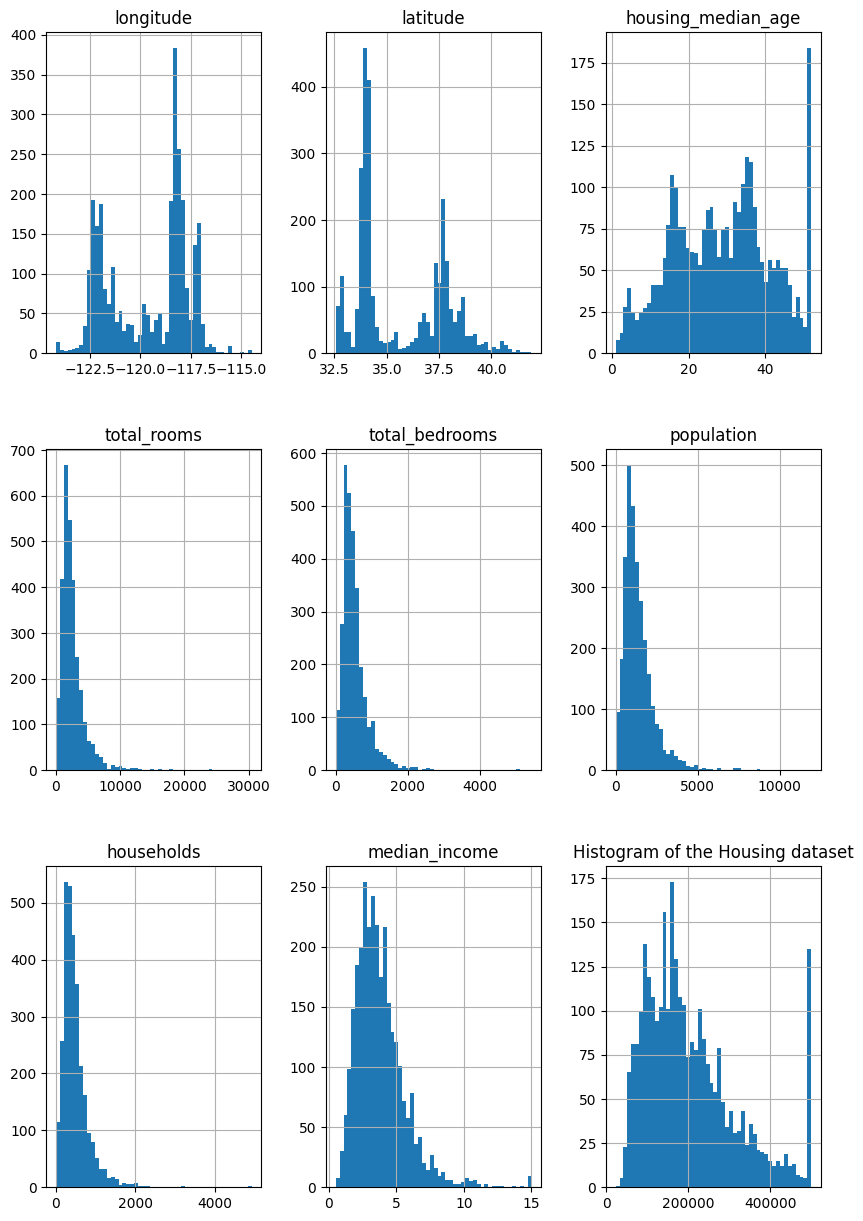

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
df0.hist(bins = 50, figsize = (10, 15))
plt.title("Histogram of the Housing dataset")
plt.show()

#Creating a testing and training splt sets

In [233]:
import numpy as np
def training_testing_split(dataset, spliting_ratio):
  shuffled_set = np.random.permutation(len(dataset))
  split_point = int(len(dataset)*spliting_ratio)
  training_size = shuffled_set[:split_point]
  testing_size = shuffled_set[split_point:]
  return dataset.iloc[training_size], dataset.iloc[testing_size]

In [234]:
training_size, testing_size = training_testing_split(df0, 0.8)
print(len(training_size))
print(len(testing_size))

2400
600


#Using an instance identifier to ensure randomness and adaptability of the dataset

In [235]:
from zlib import crc32
def testing_size_check(identifier, spliting_ratio):
  return crc32(np.int64(identifier)) &  0xffffffff > spliting_ratio* 2**32
def split_training_size_by_id(dataset, spliting_ratio, id_column):
  ids = dataset[id_column]
  #since our dataset does not have an id column, we use the row index as the id
  in_test_set = ids.apply(lambda id_: testing_size_check(id_, spliting_ratio))
  return dataset.loc[~in_test_set], dataset.loc[in_test_set]

In [236]:
#Lets apply the above function
#First we rest the set add on index column
df0_with_id = df0.reset_index()
#The, let us fetch the training and testing sets with ids
train_set, test_set = split_training_size_by_id(df0_with_id, 0.8, "index")
print(len(train_set))
print(len(test_set))

2402
598


In [237]:
#Let us use the train_test_split provided by sklearn for the purposes of this task
from sklearn.model_selection import train_test_split
train_size, test_size = train_test_split(df0, test_size = 0.2, random_state = 41)
print(len(train_size))
print(len(test_size))

2400
600


In [238]:
df0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


#Looking for Correlations


In [239]:
corr_matrix = df0.corr()
corr_matrix["median_income"].sort_values(ascending = False)

median_income         1.000000
median_house_value    0.672695
total_rooms           0.221249
households            0.048625
population            0.032361
total_bedrooms        0.024025
longitude            -0.018701
latitude             -0.072363
housing_median_age   -0.144315
Name: median_income, dtype: float64

#Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

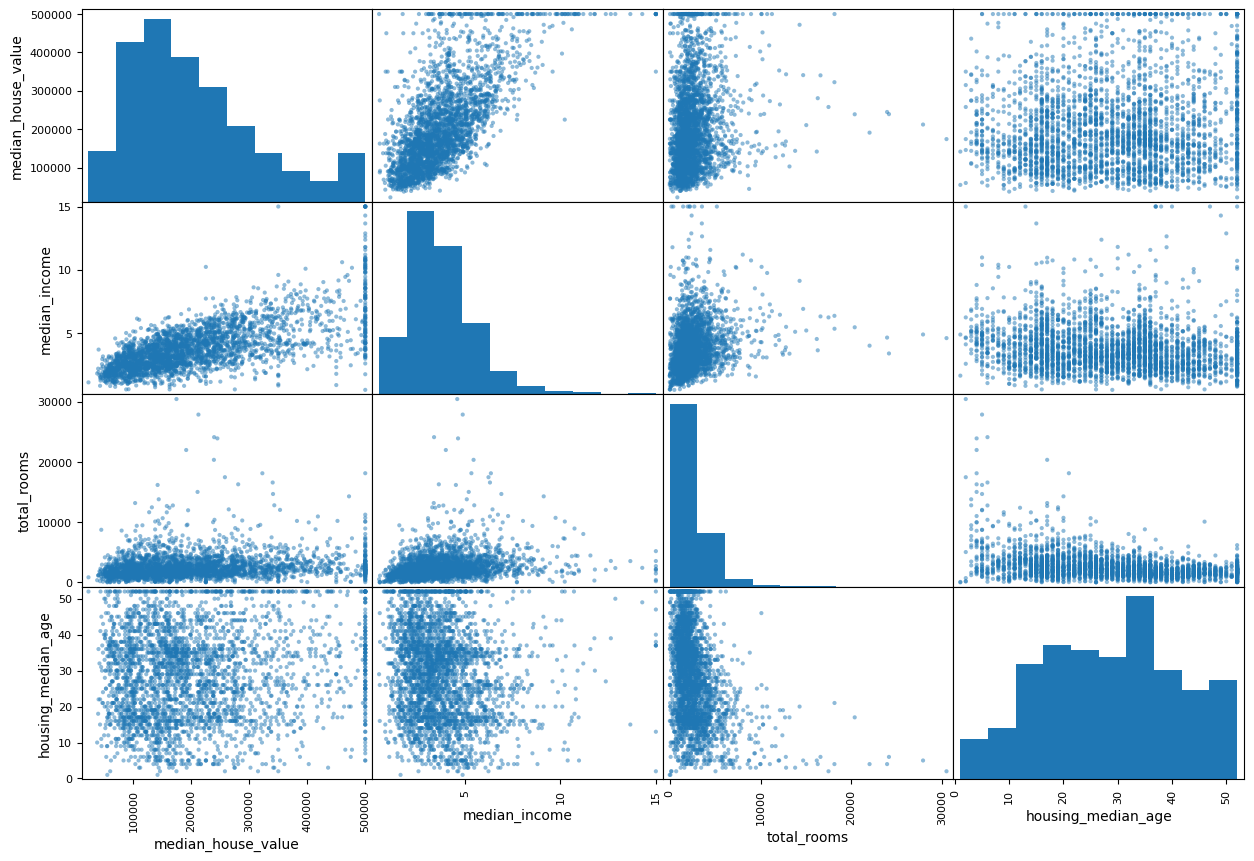

In [240]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df0[attributes], figsize = (15, 10))

#We start to prepare our data for machine learning algorithim
#First, we have to do stratified sampling based on the income category since it it our target-to minimize bias. (Ensure Randomness)

In [241]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, train_size = 0.8, random_state = 42)
#Let us define one more column, called "income_cat" to represent a randomised median income
df0["income_cat"] = pd.cut(df0["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
for train_index, test_index in split.split(df0, df0["income_cat"]):
  #Fetch the stratified traininga and testing set
  strat_training_size = df0.loc[train_index]
  strat_testing_size = df0.loc[test_index]

In [242]:
print(len(strat_training_size))
print(len(strat_testing_size))

2400
600


In [243]:
#Let us define our training features and label
strat_training_data = strat_training_size.drop("median_house_value", axis = 1)
strat_training_label = strat_training_size["median_house_value"].copy()
print(len(strat_training_data))
print(len(strat_training_label))

2400
2400


In [244]:
#Let us handle the categorical columns
df0.nunique()
df0["income_cat"].head()
df0.head()
df0.nunique().T

longitude              607
latitude               587
housing_median_age      52
total_rooms           2215
total_bedrooms        1055
population            1802
households            1026
median_income         2578
median_house_value    1784
income_cat               5
dtype: int64

In [245]:
df30 = pd.read_csv("/content/sample_data/california_housing_test.csv")
df30.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [246]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])



In [247]:
df0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,5
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,3
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,4
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,5
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,2


In [248]:
X_train, y_train = strat_training_data, strat_training_label
X_train.head()
X_train.shape

(2400, 9)

In [249]:
#This is what we will devide into X-test and y_test
strat_testing_size.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
280,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,5
785,-120.35,37.04,37.0,1495.0,292.0,858.0,275.0,2.9306,46300.0,2
2387,-117.30,34.05,6.0,2155.0,544.0,1039.0,391.0,1.6675,95800.0,2
2526,-118.08,33.77,26.0,2461.0,562.0,971.0,544.0,2.1944,87500.0,2
2341,-120.35,39.34,29.0,1986.0,474.0,337.0,100.0,4.0278,95800.0,3


In [250]:
X_T = X_train.copy()

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_df, columns = X_train.columns)
X_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,1.290990,-1.379700,-0.714678,0.670438,0.517793,1.399690,0.742431,-0.033124,0.027190
1,0.789476,-0.733645,-0.080495,0.084504,0.246430,1.001622,0.253625,-0.645624,-0.932459
2,1.260899,-1.186355,1.108599,-1.133104,-1.150849,-1.231561,-1.193784,-1.676869,-1.892107
3,-1.321895,1.001742,1.822055,-0.702230,-0.815216,-0.977292,-0.846189,0.188775,0.027190
4,0.704219,-0.733645,0.474415,-0.471241,-0.348663,0.082636,-0.308502,-1.027006,-0.932459


#We now Select and Train a Model

In [252]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [253]:
strat_testing_size.head()
X_test = strat_testing_size.drop(columns = "median_house_value")
X_test.head()
y_test = strat_testing_size["median_house_value"]
y_test.head()

print(y_test[:2])

280    483800.0
785     46300.0
Name: median_house_value, dtype: float64


In [254]:
scaled_X_test = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(scaled_X_test, columns = X_test.columns)
X_test_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,0.595508,-0.690392,0.963658,-0.343603,-0.468331,-0.788553,-0.402164,1.183936,1.938486
1,-0.390955,0.649741,0.719385,-0.575673,-0.624562,-0.585897,-0.634165,-0.483206,-0.935711
2,1.136310,-0.731982,-1.804772,-0.249788,0.010441,-0.394851,-0.305968,-1.150221,-0.935711
3,0.745731,-0.861375,-0.176284,-0.098696,0.055798,-0.466625,0.126912,-0.871977,-0.935711
4,-0.390955,1.712606,0.067989,-0.333234,-0.165949,-1.135814,-1.129289,0.096201,0.022355


In [255]:
First_5_preds = model.predict(X_train_scaled)
print(f"First_5_preds: {First_5_preds[:5]}")
print(f"Frist_5_true_values: {y_train[:5]}")

First_5_preds: [176976.62160722 126713.09956086  87055.17673433 266256.18818662
 128024.72758667]
Frist_5_true_values: 446     121800.0
87      175900.0
1530    137500.0
2158    248500.0
2392    139500.0
Name: median_house_value, dtype: float64


In [256]:
from sklearn.metrics import mean_squared_error
preds = model.predict(X_train_scaled)
model_mse = mean_squared_error(y_train, preds)
mse_e = np.sqrt(model_mse)
print(mse_e)

68256.50913310556


#Well, the model is largely inacccurate because the model is underfed


In [257]:
#Let us solve this selecting a more powerful model
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor()
model_2.fit(X_train_scaled, y_train)
predictions  = model_2.predict(X_train_scaled)
print(predictions[:5])
print(y_train[:5])
#Looks Like our model has no error! Let us find out

[121800. 175900. 137500. 248500. 139500.]
446     121800.0
87      175900.0
1530    137500.0
2158    248500.0
2392    139500.0
Name: median_house_value, dtype: float64


In [258]:
#Well, let us find out how accurate it is using the mean square error
from sklearn.metrics import mean_squared_error
predicts = model_2.predict(X_train_scaled)
mse_1 = mean_squared_error(y_train, predicts)
error_value = np.sqrt(mse_1)
print(error_value)

0.0


#Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
##it is much more likely that the model has badly overfit the data. How can we be sure? As we saw earlier, we don’t want to touch the test set until we are ready to launch a model which we are confident about, so we need to use part of the training set for training, and part for model validation

#Better Evaluation Using Cross-Validation

In [259]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_2, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv = 10)
model_2_scores = np.sqrt(-scores)

In [262]:
def display_scores(scores):
  print(f"scores: {scores}")
  print(f"mean score: {scores.mean()}")
  print(f"std deviation: {scores.std()}")

#We pass model_2_scores through the function
display_scores(model_2_scores)

scores: [78383.63991203 70732.90026015 72404.10295735 82716.7122829
 78758.47516858 77742.54664736 79593.02446959 88474.35927544
 76258.42115279 81427.19369699]
mean score: 78649.13758231697
std deviation: 4795.579320524591


#Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐ form worse than the Linear Regression model!

In [265]:
#Let us also do cross validation of the model build on LinearRegression
m_scores = cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
model_scores = np.sqrt(-m_scores)

display_scores(model_scores)

scores: [64462.8550892  60359.6151736  74156.51743938 67401.49779691
 61971.71370686 63326.42186884 73112.22369185 79465.80088704
 73808.69457253 68850.14788729]
mean score: 68691.54881135123
std deviation: 5954.922854270603


In [ ]:
#That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

#Let’s try one last model now:


#Let us Use Random Forest Regressor

In [267]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train_scaled, y_train)

m3_scores = cross_val_score(model_3, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)
model_3_scores = np.sqrt(-m3_scores)

display_scores(model_3_scores)

scores: [58146.57011208 49463.66094959 61663.99184878 55948.56073848
 54721.55135049 54523.35699775 61471.2661807  67532.08524234
 57753.91935283 59086.40305714]
mean score: 58031.13658301787
std deviation: 4663.695412324853
